In [76]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,Sequential
import matplotlib.pyplot as plt
import numpy as np


In [77]:
(X_train, y_train) , (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [78]:
X_test.shape


(10000, 32, 32, 3)

In [79]:
X_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [80]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [81]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [82]:
y_test = y_test.reshape(-1,)


In [83]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [84]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])


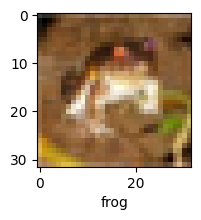

In [85]:
plot_sample(X_train,y_train,0)


In [86]:
X_train = X_train/255.0
X_test = X_test/255.0


In [87]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


C:\Users\tanma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3046 - loss: 1.9328
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4206 - loss: 1.6461
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4528 - loss: 1.5466
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4757 - loss: 1.4812
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4982 - loss: 1.4416


In [88]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.40      0.51      1000
           1       0.75      0.33      0.46      1000
           2       0.46      0.21      0.29      1000
           3       0.28      0.52      0.36      1000
           4       0.42      0.41      0.41      1000
           5       0.42      0.31      0.36      1000
           6       0.49      0.61      0.54      1000
           7       0.62      0.42      0.50      1000
           8       0.65      0.56      0.60      1000
           9       0.37      0.80      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [89]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomRotation(0.1)
])


In [90]:
cnn = models.Sequential([
    data_augmentation,
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\tanma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [92]:
cnn.fit(X_train, y_train, epochs=50)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3243 - loss: 1.8439
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4702 - loss: 1.4745
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5168 - loss: 1.3620
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5390 - loss: 1.2975
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5519 - loss: 1.2510
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5660 - loss: 1.2211
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5804 - loss: 1.1884
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5815 - loss: 1.1759
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5913 - loss: 1.1557
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5978 - loss: 1.1424
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5994 - loss: 1.1202
Epoch 12/50
1563/15

In [93]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6764 - loss: 0.9280


[0.9334285259246826, 0.6812000274658203]

In [94]:
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[1.2364425e-03, 4.8158739e-02, 4.5857704e-03, 3.0710605e-01,
        1.0056698e-03, 4.9478152e-01, 2.3034476e-02, 1.8539537e-02,
        1.1727842e-02, 8.9823939e-02],
       [7.2793569e-03, 2.4390854e-01, 1.1118715e-06, 6.7556180e-06,
        2.8895472e-06, 6.8753993e-06, 1.4368940e-06, 5.2678729e-06,
        7.4687481e-01, 1.9130098e-03],
       [1.3736320e-01, 5.7142127e-01, 2.1566497e-03, 3.6745158e-03,
        4.0106312e-03, 6.7417865e-04, 5.2124169e-04, 3.6614472e-03,
        1.8370827e-01, 9.2808634e-02],
       [8.9103681e-01, 6.8412952e-02, 3.9268876e-03, 1.1883987e-03,
        1.6879245e-03, 2.1268350e-04, 2.0827625e-04, 3.9837809e-04,
        1.7067060e-02, 1.5860666e-02],
       [3.0876109e-07, 1.0046442e-06, 7.8292275e-03, 1.7144842e-02,
        5.9943795e-01, 2.4528913e-03, 3.7147146e-01, 1.6326493e-03,
        1.3135343e-05, 1.6502583e-05]], dtype=float32)

In [95]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[5, 8, 1, 0, 4]

In [96]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

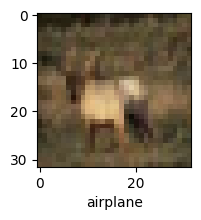

In [97]:
plot_sample(X_test, y_test,3)


In [98]:
classes[y_classes[3]]


'airplane'

In [99]:
classes[y_classes[3]]


'airplane'

In [101]:
cnn.save("my_model.keras")
